## Mini Project III

1. Based on demographics (only on the information from twm_customer)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.decomposition import PCA


# Data Wrangling

In [2]:
# Read the customer data
df_customers = pd.read_csv('twm_customer.csv', sep=';')
df_customers.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [4]:
# Check for missing or null values
df_customers.isnull().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [5]:
# Check for any inconsistencies or errors in the data
df_customers['gender'].unique()

array(['M ', 'F '], dtype=object)

In [6]:
df_customers['marital_status'].unique()

array([2, 1, 4, 3])

In [7]:
# Convert categorical data to numerical values
df_customers['gender'] = df_customers['gender'].str.strip()
df_customers['gender'].replace({'M':1,'F':2},inplace=True)
df_customers.head()


,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,1,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,1,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,2,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,2,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,2,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [8]:
# Create a new dataframe with only the relevant columns
customers = df_customers[['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender', 'marital_status']]

customers.head(10)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status
0,1362691,26150,46,5,1,1,2
1,1362487,6605,71,1,0,1,2
2,1363160,18548,38,8,0,2,1
3,1362752,47668,54,3,0,2,1
4,1362548,44554,59,9,2,2,4
5,1362813,15684,53,3,2,2,2
6,1363017,0,16,1,0,1,1
7,1362609,1929,79,8,0,2,2
8,1363486,39942,41,1,5,2,4
9,1363078,9622,46,6,1,1,2


In [9]:
customers.describe()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.559572,1.882195
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.496771,0.892051
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,1.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,1.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,2.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,2.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,2.000000,4.000000


# Data Visualization

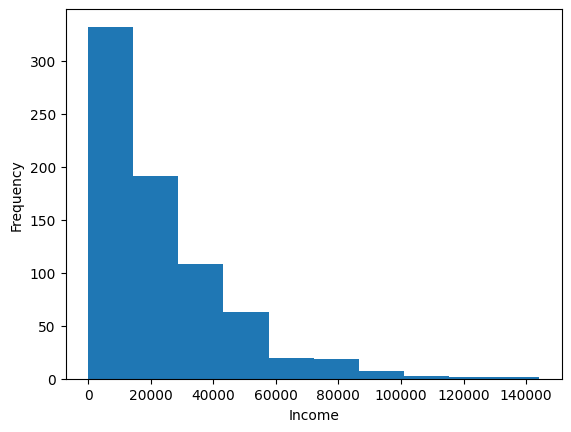

In [10]:
# Create a histogram of the income column
plt.hist(customers['income'])
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

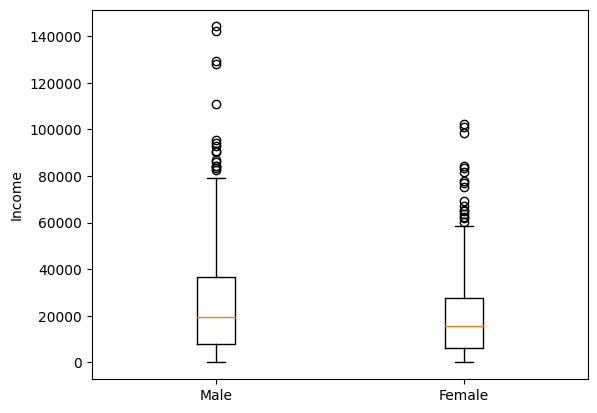

In [11]:
# Create a box plot of income for each gender
data = [customers[customers['gender'] == 1]['income'], customers[customers['gender'] == 2]['income']]
plt.boxplot(data, labels=['Male', 'Female'])
plt.ylabel('Income')
plt.show()

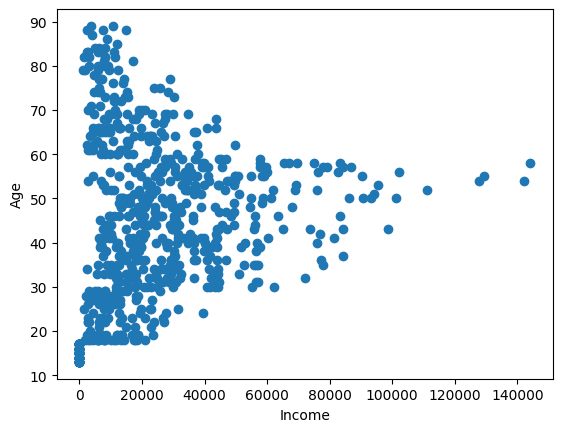

In [12]:
# Create a scatterplot of income vs age
plt.scatter(customers['income'], customers['age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

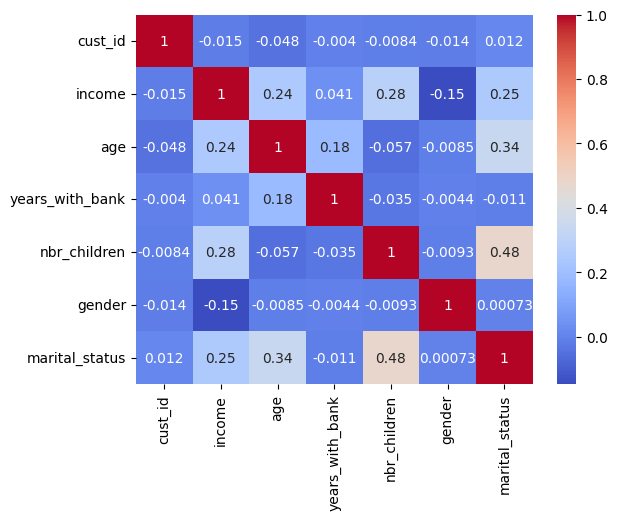

In [13]:
# Create a correlation matrix of the numeric columns in the dataframe
corr_matrix = customers.select_dtypes(include=['float64', 'int64']).corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

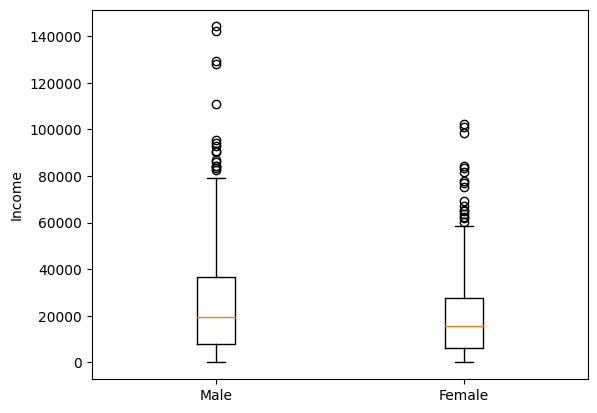

In [14]:
# Create a box plot of income for each gender
data = [customers[customers['gender'] == 1]['income'], customers[customers['gender'] == 2]['income']]
plt.boxplot(data, labels=['Male', 'Female'])
plt.ylabel('Income')
plt.show()

# Data Preparation 

In [15]:
# Define the column with outliers and delete them with the higher income
L=customers['income'].mean()-3*customers['income'].std()
U=customers['income'].mean()+3*customers['income'].std()
customers_clip=customers[ ( customers['income']>U ) | ( customers['income']<L )]
customers_clip

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status
64,1363442,144157,58,5,0,1,2
108,1363011,90248,55,5,0,1,4
153,1363009,95585,53,3,1,1,2
246,1362820,129196,55,5,2,1,3
339,1363182,101177,50,0,0,2,2
419,1362831,111004,52,2,0,1,1
422,1362566,127848,54,4,1,1,2
479,1363256,90592,50,0,0,1,2
484,1362909,98566,43,3,1,2,3
490,1362766,102286,56,6,2,2,3


In [16]:
customers = customers.drop(customers_clip.index)

In [17]:
customers = customers.drop("cust_id", axis=1)

In [18]:
customers.describe()

,income,age,years_with_bank,nbr_children,gender,marital_status
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,21196.062670,42.303815,3.925068,0.715259,1.565395,1.873297
std,18985.496367,19.231598,2.682081,1.107761,0.496043,0.891996
min,0.000000,13.000000,0.000000,0.000000,1.000000,1.000000
25%,6933.000000,27.000000,2.000000,0.000000,1.000000,1.000000
50%,16971.500000,41.000000,4.000000,0.000000,2.000000,2.000000
75%,30478.250000,56.000000,6.000000,1.000000,2.000000,2.000000
max,86744.000000,89.000000,9.000000,5.000000,2.000000,4.000000


# Data Preparation and Feature Engineering

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))

# Fit and transform the data
scaled_data = scaler.fit_transform(customers)

# Define X as the scaled feature matrix
X = scaled_data

In [20]:
scaled_customers = pd.DataFrame(scaled_data,columns = customers.columns)
scaled_customers.head()

,income,age,years_with_bank,nbr_children,gender,marital_status
0,1.507309,2.171053,2.777778,1.0,0.0,1.666667
1,0.380718,3.815789,0.555556,0.0,0.0,1.666667
2,1.069123,1.644737,4.444444,0.0,5.0,0.000000
3,2.747625,2.697368,1.666667,0.0,5.0,0.000000
4,2.568132,3.026316,5.000000,2.0,5.0,5.000000


In [21]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o', color='black')
    plt.title('Elbow plot - demographics')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

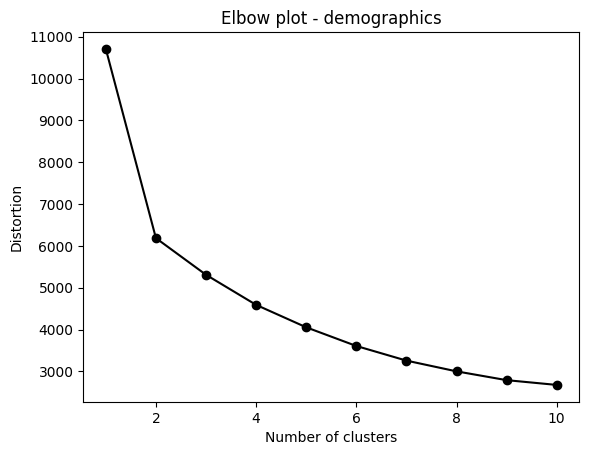

In [22]:
plot_distortion(scaled_customers)

In [23]:
# So we can choose the numer of clusters = 2 

In [24]:
# Fit KMeans algorithm with 2 clusters
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(scaled_customers)
k_labels = kmeans.labels_

# Get the cluster labels and assign them to a new column in the original dataframe
customers["cluster"] = kmeans.labels_

In [25]:
customers.head(10)

,income,age,years_with_bank,nbr_children,gender,marital_status,cluster
0,26150,46,5,1,1,2,0
1,6605,71,1,0,1,2,0
2,18548,38,8,0,2,1,1
3,47668,54,3,0,2,1,1
4,44554,59,9,2,2,4,1
5,15684,53,3,2,2,2,1
6,0,16,1,0,1,1,0
7,1929,79,8,0,2,2,1
8,39942,41,1,5,2,4,1
9,9622,46,6,1,1,2,0


# Dimensionality Reduction 

In [26]:
from sklearn.decomposition import PCA

# Instantiate a PCA object with the desired number of components
pca = PCA(n_components=2)

# Fit the PCA model to the data and transform the data
X_pca = pca.fit_transform(X)

In [27]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

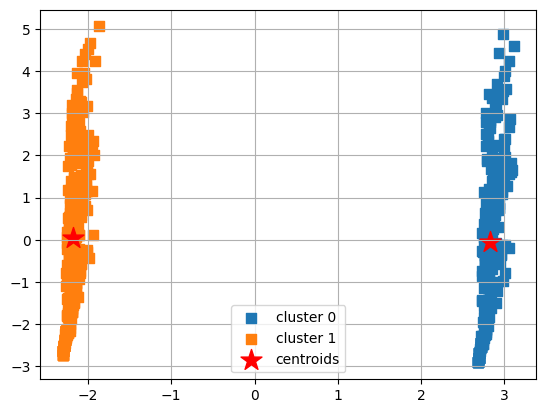

In [28]:
plot_clusters(X_pca,k_labels, plt_cluster_centers= True)

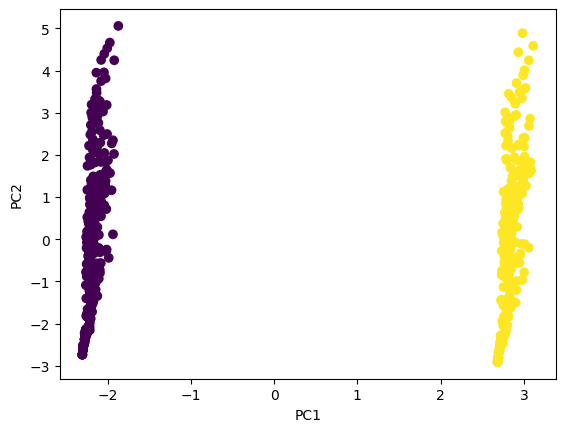

In [29]:

# Instantiate a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=2, random_state=42,n_init=10)

# Fit the KMeans model to the data and predict the cluster labels
y_pred = kmeans.fit_predict(X_pca)

# Visualize the clusters using a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Unsupervised Learning


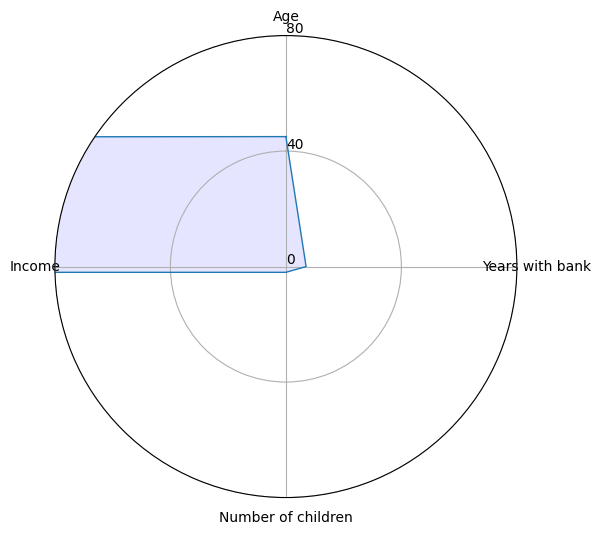

In [30]:
# Define the data for the radar chart
categories = ['Age', 'Years with bank', 'Number of children', 'Income']
values = [45, 7, 2, 60000]
max_values = [80, 10, 4, 100000]

# Calculate the angle for each category
angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([0, max_values[0] // 2, max_values[0]], [0, max_values[0] // 2, max_values[0]])
plt.ylim(0, max_values[0])
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)

plt.show()

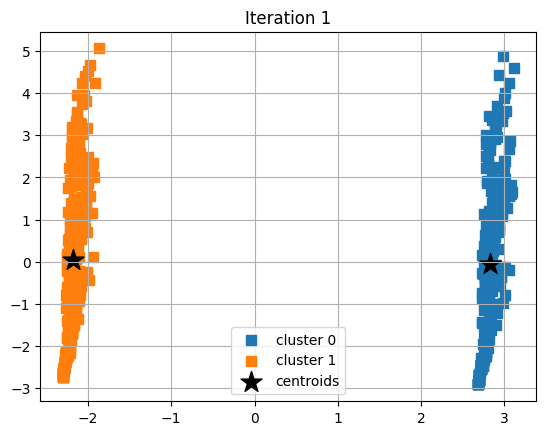

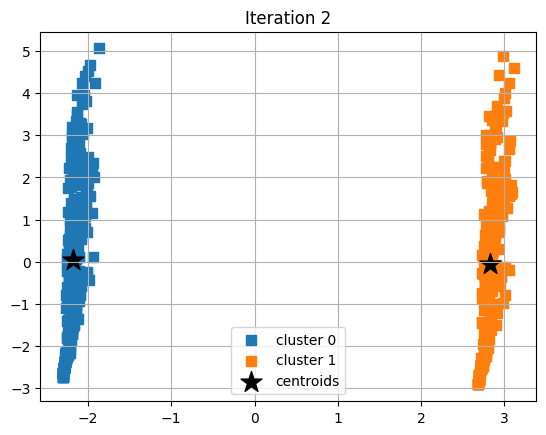

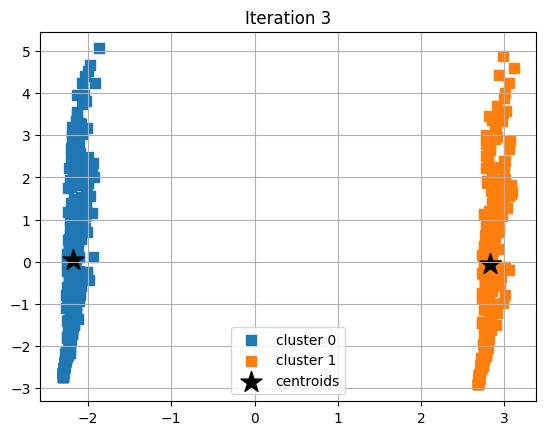

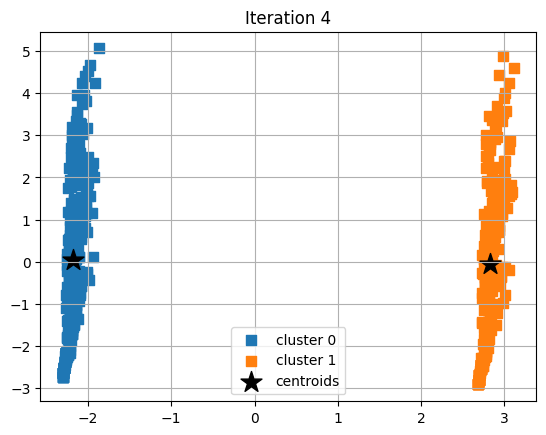

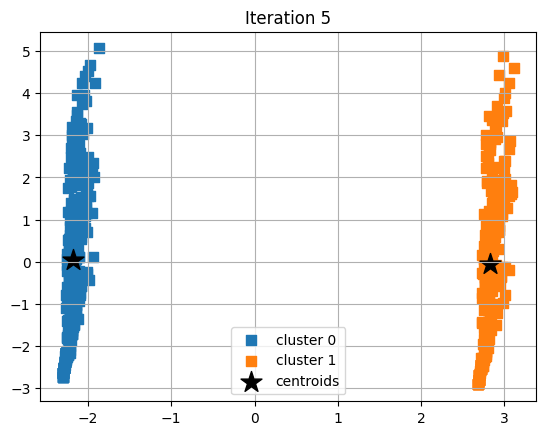

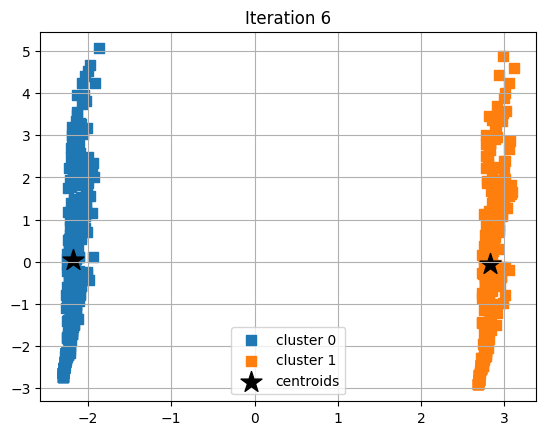

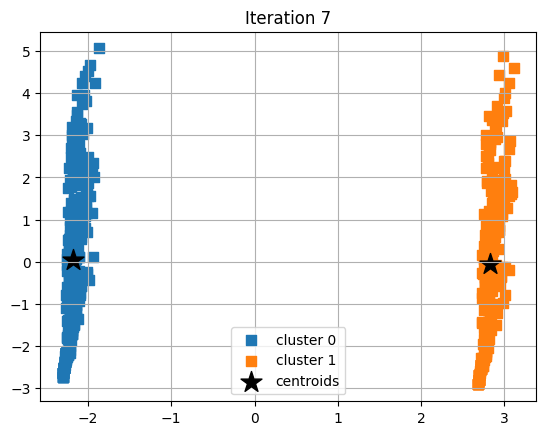

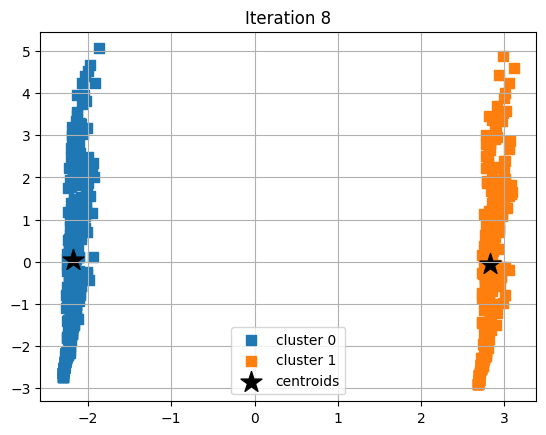

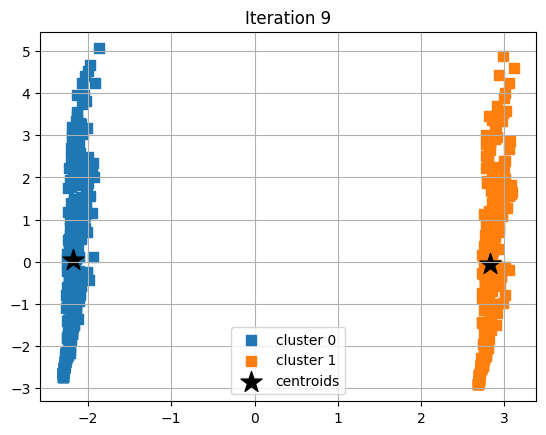

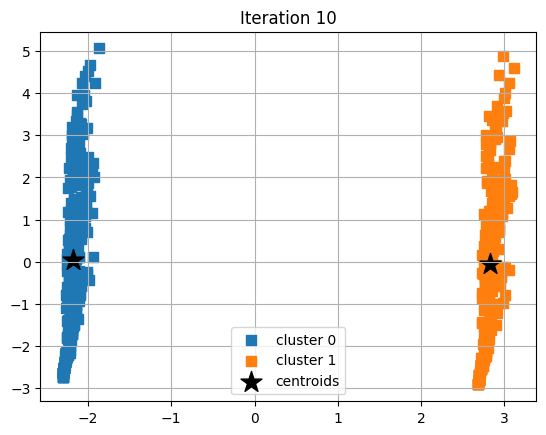

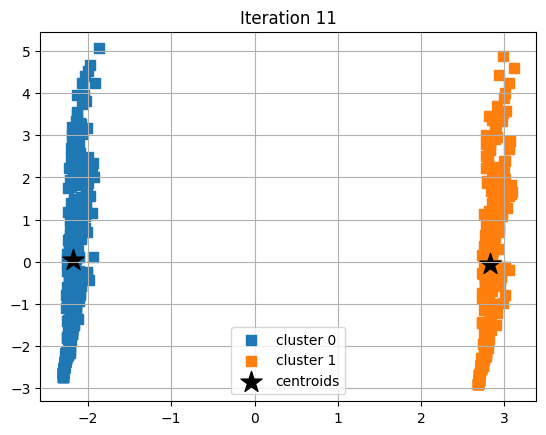

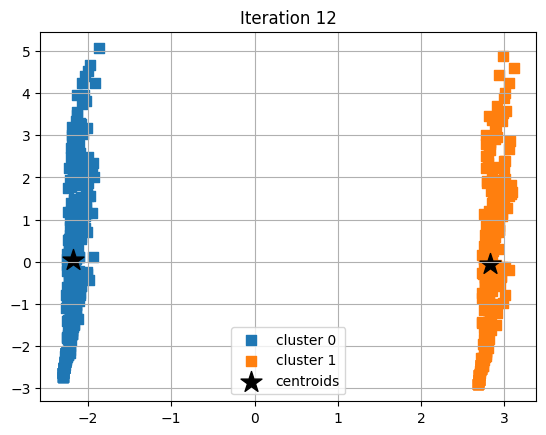

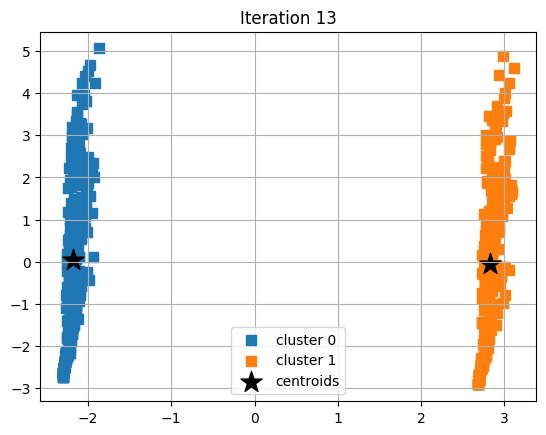

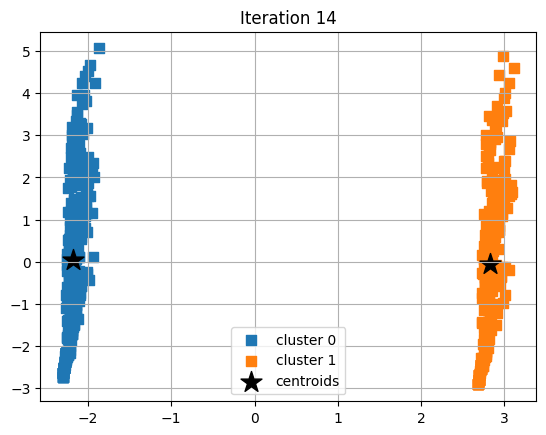

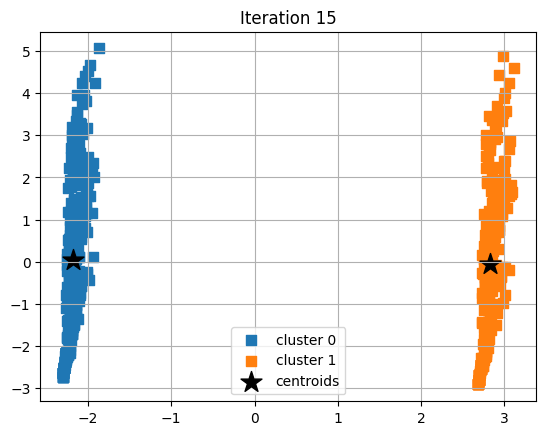

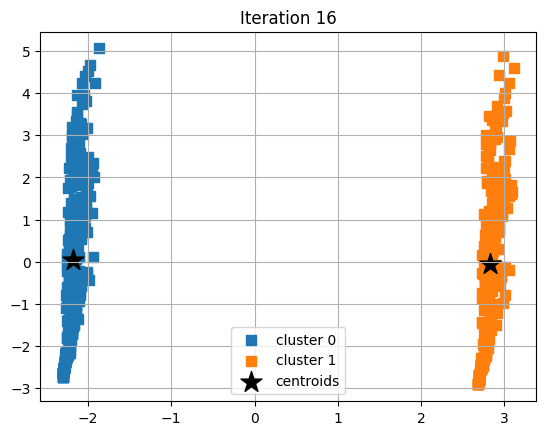

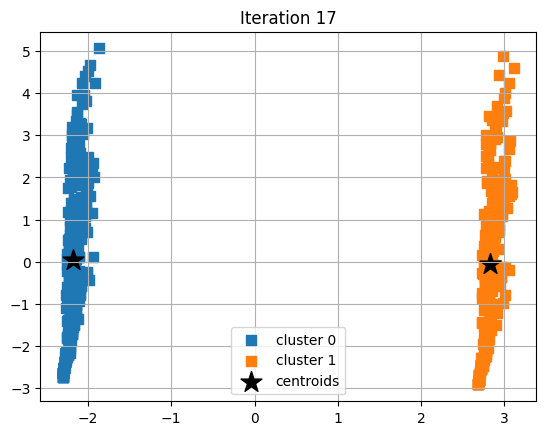

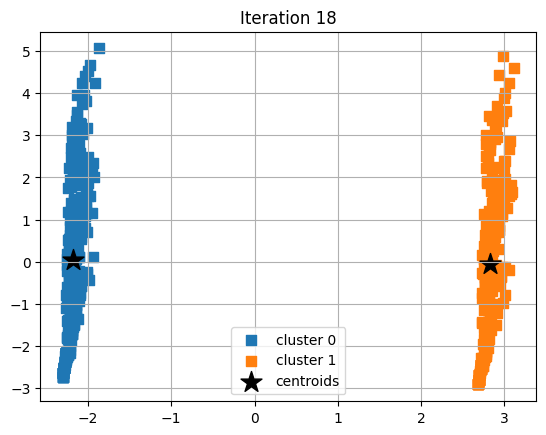

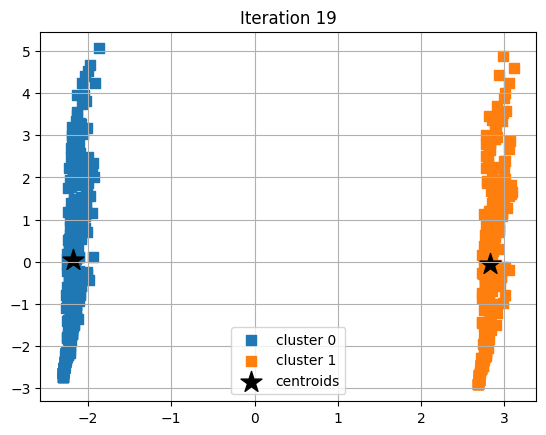

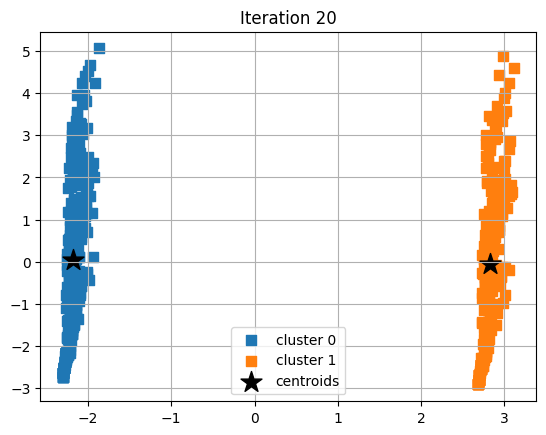

In [32]:
for i in range(1,21):
    if i == 1:
        temp = KMeans(n_clusters=2, init='random', max_iter=i, random_state=0, n_init=10).fit(X_pca)
    else:
        temp = KMeans(n_clusters=2, max_iter=i, random_state=42, n_init=10).fit(X_pca)
    clust_label = temp.labels_
    centroid = temp.cluster_centers_
    for cluster in set(clust_label):
        x = X_pca[clust_label == cluster, 0]
        y = X_pca[clust_label == cluster, 1]
        plt.scatter(x, y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    plt.scatter(centroid[:, 0], centroid[:, 1],
                marker='*',
                c='black',
                s=250,
                label='centroids')
    plt.legend()
    plt.grid()
    plt.title(f'Iteration {i}')
    plt.savefig(f'{i} cust1.png')
    plt.show()